In [475]:
import pandas as pd 
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt


In [494]:
# Option Paramaters 

# Covered Call

callStrikePrice = .2 # premium of strike price vs market price 
callPrice = .02 # cost ot purchase on option

# Covered Put

putStrikePrice = -.2 # discount of strike price vs market price 
putPrice = .02 # cost ot purchase on option

# Other Paramaters 
annualYield = .2 # yield on assets 
expiryTime = 7 #number of days to expiry 


In [495]:
def coveredCallReturn(priceChange) : 
    assets = (1 + callPrice)*(1 + annualYield*expiryTime/365)
    optionValue = max(priceChange - callStrikePrice , 0) 
    finalValue = (assets * (1 + priceChange) - optionValue) / (1+priceChange)
    return (finalValue)

def coveredPutReturn(priceChange) : 
    assets = (1 + putPrice)*(1 + annualYield*expiryTime/365)
    optionValue = max(putStrikePrice - priceChange , 0) 
    finalValue = assets - optionValue
    return (finalValue)


In [496]:
priceChange = .1
coveredCallReturn(priceChange) 

1.0239123287671232

In [497]:
coveredPutReturn(-.6)

0.6239123287671233

In [498]:
asset = 'ETH'

df = pd.read_csv("prices_all_1h" + asset + ".csv")
cols = ['Time']
cols.append('Open_' + asset)
cols.append('Close_' + str(expiryTime) +  '_' + asset)
cols.append('Fwd_Close_' + str(expiryTime) + '_' + asset)
cols.append('Fwd_Max_' + str(expiryTime) + '_' + asset)
cols.append('Fwd_Min_' + str(expiryTime) + '_' + asset)



In [499]:
df_sim = df[cols]

In [500]:
df_sim = df_sim.dropna()
df_sim = df_sim[ : -8]

In [501]:
#df_sim = df_sim[300 : ]

In [502]:
n = len(df_sim)

In [503]:
n

660

In [504]:
pLow = -0.8; pHigh = .8 
nSims = 100
pIncr = (pHigh - pLow) / nSims

pChange = []
callReturn = []
putReturn = []

p = pLow

for j in range(nSims) : 
    call = coveredCallReturn(p) - 1
    put = coveredPutReturn(p) - 1
    pChange.append(p)
    callReturn.append(call)
    putReturn.append(put)
    p += pIncr


In [505]:
df.head()

,Time,Open_ETH,High_ETH,Low_ETH,Close_ETH,Volume_ETH,Fwd_Close_1_ETH,Close_1_ETH,Fwd_High_1_ETH,Fwd_Low_1_ETH,...,Fwd_High_9_ETH,Fwd_Low_9_ETH,Fwd_Max_9_ETH,Fwd_Min_9_ETH,Fwd_Close_10_ETH,Close_10_ETH,Fwd_High_10_ETH,Fwd_Low_10_ETH,Fwd_Max_10_ETH,Fwd_Min_10_ETH
0,2020-01-01 00:00:00,129.16,133.05,128.68,130.77,144770.52197,0.984748,127.19,1.012543,0.978476,...,1.123955,1.047693,1.144085,0.974605,1.102354,142.38,1.146253,1.100108,1.144085,0.974605
1,2020-01-02 00:00:00,130.72,130.78,126.38,127.19,213757.05806,1.027769,134.35,1.033813,0.962974,...,1.132573,1.086980,1.130431,0.962974,1.121022,146.54,1.121481,1.084455,1.132573,0.962974
2,2020-01-03 00:00:00,127.19,135.14,125.88,134.35,413055.18895,1.055114,134.20,1.068087,1.041749,...,1.152606,1.114553,1.164007,1.041749,1.128862,143.58,1.155751,1.118563,1.164007,1.041749
3,2020-01-04 00:00:00,134.37,135.85,132.50,134.20,184276.17102,1.007442,135.37,1.028429,0.998660,...,1.093994,1.058793,1.101808,0.998660,1.232716,165.64,1.277815,1.068021,1.101808,0.998660
4,2020-01-05 00:00:00,134.20,138.19,134.19,135.37,254120.45343,1.074143,144.15,1.076080,1.004918,...,1.279434,1.069374,1.103204,1.004918,1.239940,166.40,1.281520,1.186289,1.279434,1.004918


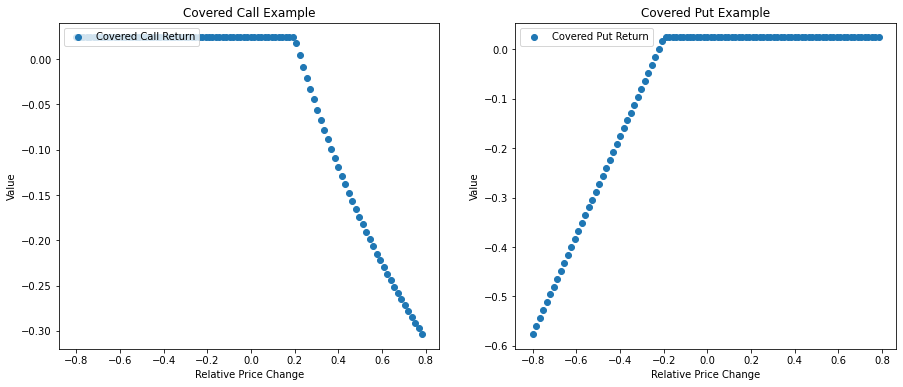

In [506]:
fig = plt.figure()
fig.set_size_inches(15,6)

#fig.subplots_adjust(hspace=1, wspace=1)

ax = fig.add_subplot(1, 2, 1)
ax.set_ylabel('Value')
ax.set_xlabel('Relative Price Change')
plt.scatter(pChange, callReturn, label = "Covered Call Return")
plt.legend(loc = 'upper left')
plt.title("Covered Call Example")

#ax.scatter(priceChangeLog, drawdownLog)
#ax2.plot(debtRatioLog, color = 'orange', label = 'Debt Ratio')
#ax2.legend()

ax = fig.add_subplot(1, 2, 2)
ax.set_ylabel('Value')
ax.set_xlabel('Relative Price Change')
plt.scatter(pChange, putReturn, label = "Covered Put Return")
plt.legend(loc = 'upper left')
plt.title("Covered Put Example")


plt.show()

In [507]:
#starting values for sim 
callCloseAccum = 1
callMaxAccum = 1
putCloseAccum = 1
putMaxAccum = 1 

relativePrice = []
priceChange = []
priceChangeMin = []
priceChangeMax = []

callReturnMax = []
callReturnClose = []
putReturnMin = []
putReturnClose = []

cumulativeCallReturnMax = []
cumulativeCallReturnClose = []
cumulativePutReturnMin = []
cumulativePutReturnClose = []

startPrice = df_sim['Open_' + asset].iloc[0]

for i in range(n):

    relativePrice.append(df_sim['Close_' + str(expiryTime) + '_' + asset].iloc[i] / startPrice)
    priceChange.append(df_sim['Fwd_Close_' + str(expiryTime) + '_' + asset].iloc[i])
    priceChangeMin.append(df_sim['Fwd_Min_' + str(expiryTime) + '_' + asset].iloc[i])
    priceChangeMax.append(df_sim['Fwd_Max_' + str(expiryTime) + '_' + asset].iloc[i])
    
    callReturnMax.append(coveredCallReturn(df_sim['Fwd_Max_' + str(expiryTime) + '_' + asset].iloc[i] - 1) )
    callReturnClose.append(coveredCallReturn(df_sim['Fwd_Close_' + str(expiryTime) + '_' + asset].iloc[i] - 1) )
    putReturnMin.append(coveredPutReturn(df_sim['Fwd_Min_' + str(expiryTime) + '_' + asset].iloc[i] - 1) )
    putReturnClose.append(coveredPutReturn(df_sim['Fwd_Close_' + str(expiryTime) + '_' + asset].iloc[i] - 1) )    
    
    callCloseAccum = callCloseAccum*coveredCallReturn(df_sim['Fwd_Close_' + str(expiryTime) + '_' + asset].iloc[i] - 1) 
    callMaxAccum = callMaxAccum*coveredCallReturn(df_sim['Fwd_Max_' + str(expiryTime) + '_' + asset].iloc[i] - 1) 
    putCloseAccum = putCloseAccum*coveredPutReturn(df_sim['Fwd_Close_' + str(expiryTime) + '_' + asset].iloc[i] - 1) 
    putMaxAccum = putMaxAccum*coveredPutReturn(df_sim['Fwd_Min_' + str(expiryTime) + '_' + asset].iloc[i] - 1) 
    
    cumulativeCallReturnMax.append(callMaxAccum)
    cumulativeCallReturnClose.append(callCloseAccum)
    cumulativePutReturnMin.append(putMaxAccum)
    cumulativePutReturnClose.append(putCloseAccum)

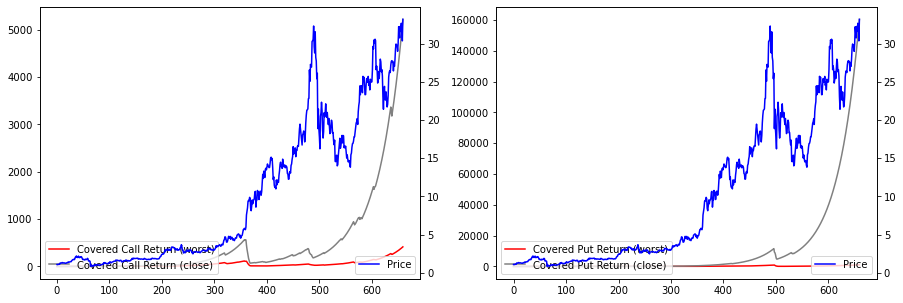

In [508]:
#plt.subplot()
fig = plt.figure()
fig.set_size_inches(15,5)

#fig.subplots_adjust(hspace=1, wspace=1)

ax = fig.add_subplot(1, 2, 1)
ax.plot(cumulativeCallReturnMax, color = 'red', label = 'Covered Call Return (worst)' )
ax.plot(cumulativeCallReturnClose, color = 'grey', label = 'Covered Call Return (close)' )

ax2 = ax.twinx()
ax2.plot(relativePrice, color = 'blue', label = 'Price' )
#ax2.plot(debtRatioLog, color = 'orange', label = 'Debt Ratio')
ax2.legend(loc = 'lower right')

ax.legend(loc = 'lower left')


ax = fig.add_subplot(1, 2, 2)

ax.plot(cumulativePutReturnMin, color = 'red', label = 'Covered Put Return (worst)' )
ax.plot(cumulativePutReturnClose, color = 'grey', label = 'Covered Put Return (close)' )

ax.legend(loc = 'lower left')

ax2 = ax.twinx()
ax2.plot(relativePrice, color = 'blue', label = 'Price' )
#ax2.plot(debtRatioLog, color = 'orange', label = 'Debt Ratio')
ax2.legend(loc = 'lower right')

plt.show()

(array([  1.,   0.,   2.,   2.,   0.,   0.,   2.,   1.,   1.,   0.,   2.,
          2.,   1.,   8.,   7.,   8.,  13.,  19.,   8., 583.]),
 array([0.70940763, 0.72513286, 0.7408581 , 0.75658333, 0.77230857,
        0.7880338 , 0.80375904, 0.81948427, 0.83520951, 0.85093474,
        0.86665998, 0.88238521, 0.89811045, 0.91383568, 0.92956092,
        0.94528615, 0.96101139, 0.97673662, 0.99246186, 1.00818709,
        1.02391233]),
 <BarContainer object of 20 artists>)

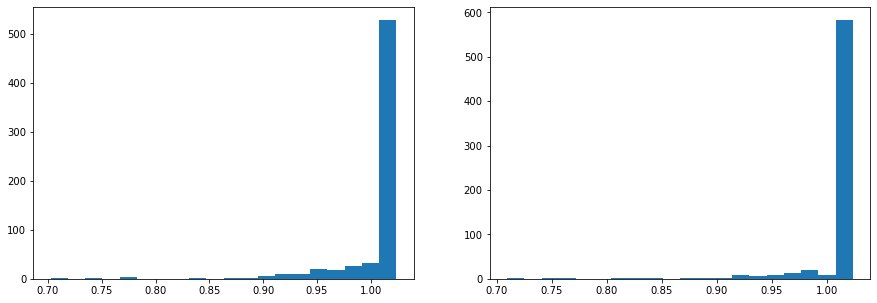

In [509]:
fig = plt.figure()
fig.set_size_inches(15,5)
n_bins = 20

ax = fig.add_subplot(1, 2, 1)
# We can set the number of bins with the `bins` kwarg
ax.hist(callReturnMax, bins=n_bins)

ax = fig.add_subplot(1, 2, 2)
ax.hist(callReturnClose, bins=n_bins)

In [492]:
# look at range of prices for options / strike price 

callStrikePrice = .15 # premium of strike price vs market price 
callPriceMin = .0 # cost ot purchase on option
callPriceMax = .015 # cost ot purchase on option

putStrikePrice = -0.15 # premium of strike price vs market price 
putPriceMin = .0 # cost ot purchase on option
putPriceeMax = .02 # cost ot purchase on option

nSims = 40
pIncrCall = (callPriceMax - callPriceMin) / nSims
pIncrPut = (callPriceMax - callPriceMin) / nSims


callPrices = []
callCloseRet = []
callMaxRet = []

putPrices = []
putCloseRet = []
putMaxRet = []

callPrice = callPriceMin
putPrice = putPriceMin


for j in range(nSims) : 
    callCloseAccum = 1
    callMaxAccum = 1
    putCloseAccum = 1
    putMaxAccum = 1
    callPrices.append(callPrice)
    putPrices.append(putPrice)

    for i in range(n):
        callCloseAccum = callCloseAccum*coveredCallReturn(df_sim['Fwd_Close_' + str(expiryTime) + '_' + asset].iloc[i] - 1) 
        callMaxAccum = callMaxAccum*coveredCallReturn(df_sim['Fwd_Max_' + str(expiryTime) + '_' + asset].iloc[i] - 1) 

        putCloseAccum = putCloseAccum*coveredPutReturn(df_sim['Fwd_Close_' + str(expiryTime) + '_' + asset].iloc[i] - 1) 
        putMaxAccum = putMaxAccum*coveredPutReturn(df_sim['Fwd_Min_' + str(expiryTime) + '_' + asset].iloc[i] - 1) 
        
        
    callCloseRet.append(callCloseAccum)
    callMaxRet.append(callMaxAccum)

    putCloseRet.append(putCloseAccum)
    putMaxRet.append(putMaxAccum)

    callPrice += pIncrCall
    putPrice += pIncrPut

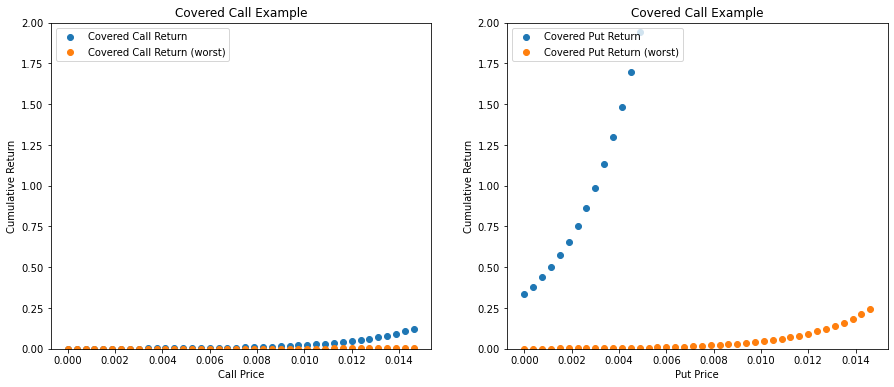

In [493]:
fig = plt.figure()
fig.set_size_inches(15,6)

#fig.subplots_adjust(hspace=1, wspace=1)

ax = fig.add_subplot(1, 2, 1)
ax.set_ylabel('Cumulative Return')
ax.set_xlabel('Call Price')
ax.set_ylim([0, 2])
plt.scatter(callPrices, callCloseRet, label = "Covered Call Return")
plt.scatter(callPrices, callMaxRet, label = "Covered Call Return (worst)")
plt.legend(loc = 'upper left')
plt.title("Covered Call Example")

#ax.scatter(priceChangeLog, drawdownLog)
#ax2.plot(debtRatioLog, color = 'orange', label = 'Debt Ratio')
#ax2.legend()

ax = fig.add_subplot(1, 2, 2)
ax.set_ylabel('Cumulative Return')
ax.set_xlabel('Put Price')
ax.set_ylim([0, 2])

plt.scatter(callPrices, putCloseRet, label = "Covered Put Return")
plt.scatter(callPrices, putMaxRet, label = "Covered Put Return (worst)")
plt.legend(loc = 'upper left')
plt.title("Covered Call Example")



plt.show()